### 회귀 모델의 규제
* 정규화 (Ridge, Lasso, ElasticNet)

    모델에 규제항을 더해 기존 모델보다 단순하게 만듦

    회귀계수 값이 너무 커지는 것을 방지 -> 과적합 예방, 일반화 성능 향상

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 부동산 시세 데이터
data= pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

data.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# 중복값, 결측치 확인
data.duplicated().sum()

0

In [16]:
data.isna().sum()[data.isna().sum()!=0]/len(data)


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [17]:
# 결측치가 80%가 넘는 컬럼 제거
cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
data.drop(cols, axis=1, inplace=True)

In [18]:
data.nunique()[data.nunique() > len(data)*0.7]

Id         1460
LotArea    1073
dtype: int64

In [19]:
# 고유값이 너무 많은 컬럼 제거
cols = ['Id', 'LotArea']
data.drop(cols, axis=1, inplace=True)

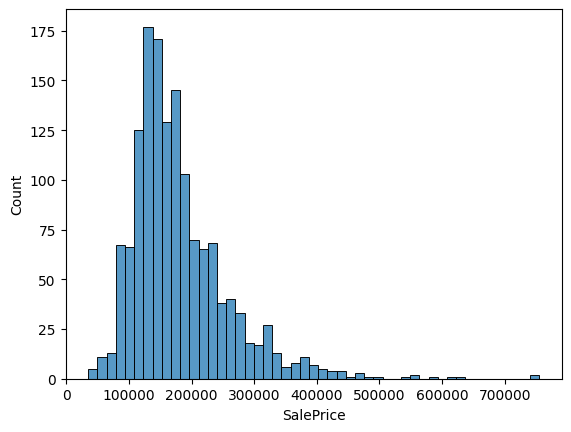

In [23]:
# 타겟 분포 확인
sns.histplot(data['SalePrice']);

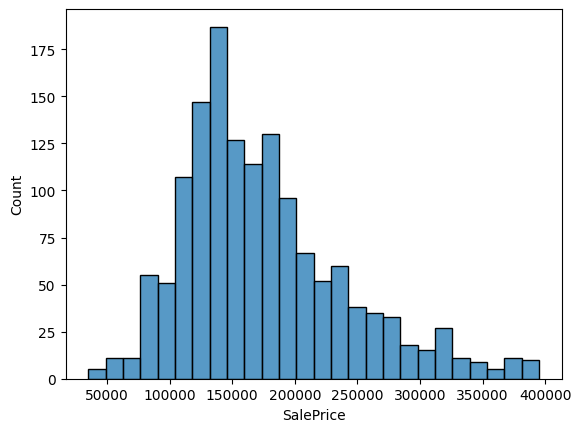

In [25]:
# 400000이하 데이터의 분포만 확인
df = data[data['SalePrice'] < 400000]
sns.histplot(df['SalePrice']);

In [29]:
# 상관계수 확인
data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [ ]:
# 산점도 그리기


* Lasso 규제는 회귀계수가 0으로 수렴하여 변수를 선택하는 효과를 가지게 된다.